In [36]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [37]:
qLearningCar = QLearning("rgb_array")

In [38]:
all_iterations = []
all_alphas = []
all_epsilons = []
all_gammas = []

In [1]:
iterations = 50000
all_iterations.append(iterations)

alpha = 0.1 #learning_rate: variacion permitida
all_alphas.append(alpha)

epsilon = 1 #exploration_rate:  más grande mas exploracion
all_epsilons.append(epsilon)

gamma = 0.99  #discount_factor: futuro - ¿¿¿learning rate???? - mas bajo mas greedy
all_gammas.append(gamma)

NameError: name 'all_iterations' is not defined

In [ ]:
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [69]:
print(all_epsilons)
print(all_iterations)

[0.99, 0.9, 0.8, 0.7, 0.5]
[50000, 50000, 50000, 100000, 100000]


In [41]:
divPos = qLearningCar.observation_space.shape[0]
divVel = 10

In [42]:
# start a new wandb run to track this script
wandb.init(
    # Dejar solo un proyecto
    project="MountainCar",
    
    # track hyperparameters and run metadata
    config={
        "initial_alpha": alpha,
        "initial_epsilon": epsilon,
        "initial_gamma": gamma,
        "Discretizacion_ Pos": divPos,
        "Discretizacion_ Vos": divVel,
        "max_exploration_rate": max_exploration_rate,
        "max_exploration_rate": min_exploration_rate,
        "max_exploration_rate": exploration_decay_rate
    }
)

In [43]:
#qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [ ]:
pickle_in = open("Pickles\Q_-349-Pos_33_Vel_11.pkl","rb")
Old_Q = pickle.load(pickle_in)

In [45]:
#qLearningCar.setQ(Old_Q)

In [70]:
Q, initial_state_Q_list = qLearningCar.qLearning_bajar_epsilon_1(iterations, alpha, epsilon, gamma)

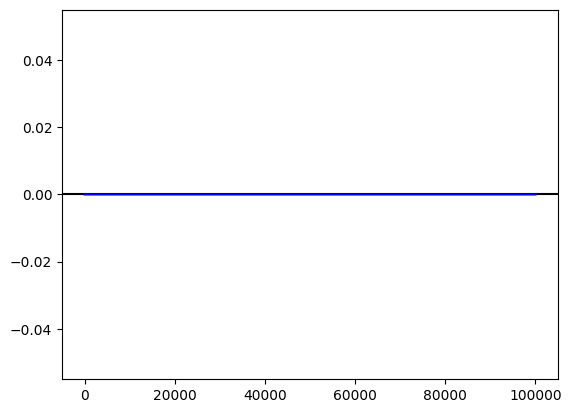

In [72]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

In [29]:
data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Decrease epislon Q_train_2" : wandb.plot.line(table, "x", "y",
           title="#Decrease epislon Q train 2")})

In [73]:
qLearningCar.execute(100)

-500.0

In [74]:
qLearningCar.rewards

[-340.62, -500.0, -500.0, -500.0, -500.0]

In [75]:
#tendria que subir la plot
wandb.log({"rewards": qLearningCar.rewards})

In [76]:
# log metrics to wandb --> these go on a separate table than the configuration in config.
wandb.log({
    "iterations": all_iterations, 
    "alphas": all_alphas, 
    "epsilons": all_epsilons, 
    "gammas": all_gammas, 
})

In [77]:
#finished uploading
wandb.finish()

In [35]:
pickle_out = open('Q_after_decreasing_epsilon_1_-500.pkl', 'wb')
pickle.dump(Q, pickle_out)
pickle_out.close()

In [7]:
iterations_to_run = 100000
iterations_total = 0
while(iterations_total < 1200000):
    Q, initial_state_Q_list = qLearningCar.qLearning(iterations_to_run, alpha, epsilon, gamma)
    test_value = qLearningCar.execute(100)
    
    if(test_value > -500):
        pickle_out = open('Q_auto.pkl', 'wb')
        pickle.dump(Q, pickle_out)
        pickle_out.close()
        break

    iterations_total += iterations_to_run
    print(iterations_total)

    data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
    table = wandb.Table(data=data, columns = ["x", "y"])
    wandb.log(
        {"Continued Q_train_1" : wandb.plot.line(table, "x", "y",
           title="#Continued 1 Q train")
        }
    )

100000
200000
300000


In [10]:
wandb.log({
    "total iterations": iterations_total 
})
iterations_total

300000

In [2]:
list = []
for i in range (100):
    list.append(i)